In [1]:
# Import required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/Dataset file/IMDB Dataset.csv/IMDB Dataset.csv')

In [10]:
# Load the regular expression library
import re

# Remove punctuation
data['processed_review'] = data['review'].map(lambda x: re.sub('[,\.!?":-]', '', x))

# Remove <br /r> with space
data['processed_review'] = data['processed_review'].map(lambda x: re.sub('<br /><br />', ' ', x))

# Convert the titles to lowercase
data['processed_review'] = data['processed_review'].map(lambda x: x.lower())

# create new column for sentiments
data['num_sentiment'] = data['sentiment'].replace("positive", 1) # replaced positive with 1
data['num_sentiment'] = data['num_sentiment'].replace("negative", 0) # replaced negative with 0

# Check the data
data.head()

,review,sentiment,processed_review,num_sentiment
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tec...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei's love in the time of money is a...,1


In [12]:
training_size = 40000

training_reviews = data['processed_review'][0:training_size]
testing_reviews = data['processed_review'][training_size:]

training_labels = data['num_sentiment'][0:training_size]
testing_labels = data['num_sentiment'][training_size:]

In [17]:
# Import modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

words = 1000 # vocab_size
oov_tok = "<OOV>"
max_length = 1000
padding_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(num_words=words, oov_token=oov_tok)
tokenizer.fit_on_texts(training_reviews)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_reviews)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_reviews)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [18]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(words, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

In [20]:
history = model.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/30
1250/1250 [==============================] - 10s 7ms/step - loss: 0.5866 - accuracy: 0.7003 - val_loss: 0.4190 - val_accuracy: 0.8289
Epoch 2/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3687 - accuracy: 0.8489 - val_loss: 0.3479 - val_accuracy: 0.8561
Epoch 3/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3315 - accuracy: 0.8628 - val_loss: 0.3318 - val_accuracy: 0.8630
Epoch 4/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3174 - accuracy: 0.8695 - val_loss: 0.3218 - val_accuracy: 0.8658
Epoch 5/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3076 - accuracy: 0.8731 - val_loss: 0.3383 - val_accuracy: 0.8551
Epoch 6/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3019 - accuracy: 0.8745 - val_loss: 0.3104 - val_accuracy: 0.8691
Epoch 7/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.2981 - accuracy: 0.8765 - val_loss: 0.3109 - val_accuracy

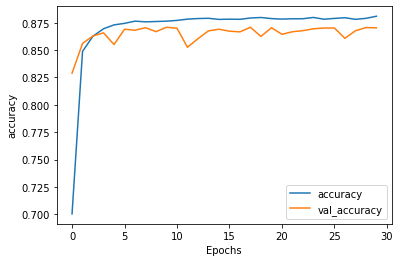

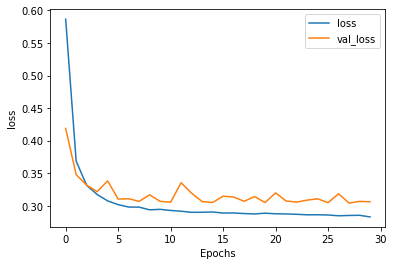

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [27]:
sentence = ["This movie is absolutely terrible. The directing, acting, script and production are all bad. There is actually NOTHING redeemable about it. In fact if MY friend was in this movie, instead of giving it a perfect score, I'd stop being friends with them. That's how bad it is. YOU HAVE BEEN WARNED DO NOT WASTE YOUR TIME ON THIS MOVIE."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 21ms/step
[[0.00371902]]
